<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Для того, чтобы результаты можно было реплицировать.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [227]:
import pandas as pd

In [228]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [X] Отобразите 30 случайных строк тренировочного датасета.
- [X] Отобразите первые 5 и последние 5 объектов тестового датасета
- [X] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [X] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [X] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- Можно понять общую структуру данных, примерные диапазоны значений и типы признаков, увидеть, что есть пропуски.
- Нельзя делать выводы о нижней/верхней границе значений, количестве категорий, выводы об распределениях характеристик (например, в первых пяти строках большинство автомобилей используют дизельное топливо, это не значит, что так будет на всем датасете).
- [X] Достаточно ли метода duplicated для анализа дубликатов? Почему?
- Метода duplicated может быть недостаточно, так как он проверяет полные совпадения строк, а иногда даже одинаковые обьявления могут иметь отличия, например название одного и того же автомобился можно написать по-разному.
- *0.15 балла**
- [X] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [229]:
df_train.sample(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [230]:
df_train.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [231]:
df_train.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [232]:
df_train.columns[df_train.isnull().any()]

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

In [233]:
df_train.duplicated().sum()

np.int64(985)

Перед тем, как строить дашборд, приведем числовые столбцы к нужному типу. Это в любом случае нужно будет сделать в дальнейшем, а сейчас это упростит анализ этих признаков с помощью дашбода.

Столбцы `'mileage', 'engine', 'max_power', 'torque'` имеют тип данных object, но фактически являюттся числовыми. Преобразуем значения этих столбцов. Стоит обратить внимаение на столбец `torque`, он содержит как значение момента силы, так и количество оборотов в минуту. Сейчас извлечем только момент силы, преобразовав в Nm.

Для этого используем простой алгоритм:
- если есть обозначение Nm, берем значение перед ним;
- если нет, считаем, что момент силы в kgm, берем первое число и преобразуем в nm.

Для остальных столбцов просто выкинем единицу измерения и преобразуем в нужный тип данных.


In [234]:
KG_M_TO_NM = 9.80665


def extract_torque_nm(torque: str) -> float:
    if pd.isna(torque):
        return np.nan

    val = torque.lower()

    if "@" in val:
        val = val.split("@")[0]

    if "/" in val:
        val = val.split("/")[0]

    if "nm" in val:
        val = val.split("nm")[0].strip()
        return float(val)

    if "(" in val:
        val = val.split("(")[0].strip()
        return float(val)

    return float(val.split("kgm")[0].strip()) * KG_M_TO_NM


def strip_single_scale(val: str) -> float:
    if pd.isna(val):
        return np.nan

    try:
        return float(val.split()[0].strip())
    except ValueError:
        return np.nan

In [235]:
# Посчитаем статистики до преобразований, чтобы не хранить старый датасет
df_train_stats_raw, df_test_stats_raw = df_train.describe(include="number"), df_test.describe(include="number")
df_train_stats_raw_cat, df_test_stats_raw_cat = df_train.describe(include=["object", "category"]), df_test.describe(
    include=["object", "category"])

In [236]:
df_train["torque"] = df_train["torque"].apply(extract_torque_nm)
df_train["mileage"] = df_train["mileage"].apply(strip_single_scale)
df_train["engine"] = df_train["engine"].apply(strip_single_scale)
df_train["max_power"] = df_train["max_power"].apply(strip_single_scale)

df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque           float64
seats            float64
dtype: object

Сразу преобразуем в более узкие типы.

In [237]:
fcols = df_train.select_dtypes("float").columns
icols = df_train.select_dtypes("integer").columns
cat_cols = ["fuel", "seller_type", "transmission", "owner"]

df_train[fcols] = df_train[fcols].apply(pd.to_numeric, downcast="float")
df_train[icols] = df_train[icols].apply(pd.to_numeric, downcast="integer")
df_train[cat_cols] = df_train[cat_cols].astype("category")

In [238]:
df_train.dtypes

name               object
year                int16
selling_price       int32
km_driven           int32
fuel             category
seller_type      category
transmission     category
owner            category
mileage           float32
engine            float32
max_power         float32
torque            float32
seats             float32
dtype: object

Повторим для тестовой выборки, эти преобразования не зависят от данных тестовой выборки, поэтому data leak не должно быть.

In [239]:
df_test["torque"] = df_test["torque"].apply(extract_torque_nm)
df_test["mileage"] = df_test["mileage"].apply(strip_single_scale)
df_test["engine"] = df_test["engine"].apply(strip_single_scale)
df_test["max_power"] = df_test["max_power"].apply(strip_single_scale)

df_test[fcols] = df_test[fcols].apply(pd.to_numeric, downcast="float")
df_test[icols] = df_test[icols].apply(pd.to_numeric, downcast="integer")
df_test[cat_cols] = df_test[cat_cols].astype("category")

In [240]:
profile = ProfileReport(df_train, title="Cars Profiling")
profile.to_file("cars_profiling.html")

Summarize dataset:  75%|███████▌  | 15/20 [00:00<00:00, 115.59it/s, Calculate auto correlation]/Users/a.kargopolov/Study/HSE/ml/hw-1/.venv/lib/python3.10/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[8 8 7 ... 7 8 8]' has dtype incompatible with int16, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/Users/a.kargopolov/Study/HSE/ml/hw-1/.venv/lib/python3.10/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/Users/a.kargopolov/Study/HSE/ml/hw-1/.venv/lib/python3.10/site-packages/ydata_profil

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [X] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [241]:
medians = df_train.median(numeric_only=True)
df_train = df_train.fillna(medians)
df_test = df_test.fillna(medians)
f"No nans: {len(df_train.columns[df_train.isnull().any()]) == 0}"

'No nans: True'

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [X] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [X] Отобразите такие объекты (0.15 балла)
- [X] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [X]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [242]:
duplicates_mask = df_train.drop(columns=["selling_price"]).duplicated()
f"Duplicates: {duplicates_mask.sum()}"

'Duplicates: 1159'

In [243]:
df_train[duplicates_mask]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.900000,1197.0,82.000000,114.000000,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.600000,1197.0,85.800003,114.000000,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.100000,1197.0,85.800003,114.000000,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.600000,1999.0,177.000000,430.000000,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.370001,2487.0,214.559998,202.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.000000,995.0,62.000000,90.300003,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.400000,1498.0,98.629997,215.000000,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.590000,1248.0,74.000000,190.000000,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.570000,1396.0,70.000000,140.000000,5.0


In [244]:
df_train = df_train[~duplicates_mask].reset_index(drop=True)

In [245]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.0,74.000000,190.000000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498.0,103.519997,250.000000,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.0,90.000000,219.668961,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.0,88.199997,112.776474,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.139999,1197.0,81.860001,113.750000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.920000,1086.0,62.099998,96.099998,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.900000,998.0,67.099998,90.000000,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.500000,1197.0,82.849998,113.699997,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493.0,110.000000,235.359604,5.0


In [246]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [X] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [X] Приведите тип данных к ``float``.
* [X] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [247]:
df_train = df_train.drop(columns=["torque"])
df_test = df_test.drop(columns=["torque"])

Остальное выполнено в задании 1.


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [X] Осуществите приведение столбцов к необходимому типу.

In [248]:
ficols = ["engine", "seats"]
df_train[ficols] = df_train[ficols].apply(pd.to_numeric, downcast="integer")
df_test[ficols] = df_train[ficols].apply(pd.to_numeric, downcast="integer")

In [249]:
df_train.dtypes

name               object
year                int16
selling_price       int32
km_driven           int32
fuel             category
seller_type      category
transmission     category
owner            category
mileage           float32
engine              int16
max_power         float32
seats                int8
dtype: object

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [X] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [X] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [X] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

До преобразования:

In [250]:
df_train_stats_raw

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [251]:
df_train_stats_raw_cat

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [252]:
df_test_stats_raw

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [253]:
df_test_stats_raw_cat

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


После преобразования:

In [254]:
df_train.describe(include="number")

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428612,1429.448973,87.910774,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639584,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950001,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.299999,1248.000000,81.860001,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.299999,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [255]:
df_train.describe(include=["object", "category"])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [256]:
df_test.describe(include="number")

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337481,1451.424000,90.844330,5.452000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.624639,34.892708,0.990291
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.000000,34.200001,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.549999,1197.000000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.299999,1248.000000,82.424999,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.299999,1498.000000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.259998,2997.000000,280.000000,10.000000


In [257]:
df_test.describe(include=["object", "category"])

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [258]:
# Удалили torque поэтому 12
assert df_train.shape == (5840, 12)

Преобразования (выкидывание дубликатов и заполнение пропусков) значительным образом не повлияли на распределения числовых признавков. Немного сместились матожидания целевой переменной и km_driven, а так же уменьшилась дисперсия целевой переменной.
Стоит обратить внимание на обьекты с 0 и 400 max_power (выглядит нелогично для автиомобиля), с 10000000 цены, 2 млн километра прпобега.

In [259]:
df_train[(df_train["max_power"] <= 0) | (df_train["selling_price"] >= 1e7) | (df_train["km_driven"] >= 2e6)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
151,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.000000,1969,400.000000,4
476,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,19.299999,1248,0.000000,5
1112,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,19.299999,1248,0.000000,5
2003,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,19.299999,1248,0.000000,5
2680,Hyundai i20 Asta 1.2,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.600000,1197,81.830002,5


Volvo XC90 T8 Excellence BSIV выглядит нормально, а автомобили с 0 max_power выглядят как ошибка, стоит заменить значения на медианные. 2.3 млн километров пробега на Hyundai i20 Asta 1.2 выглядит невозможно, следжует так же заменить на медианное значение.

In [260]:
df_train.loc[(df_train["max_power"] <= 0), "max_power"] = df_train.loc[df_train["max_power"] > 0, "max_power"].median()
df_train.loc[(df_train["km_driven"] >= 2e6), "km_driven"] = df_train.loc[
    df_train["km_driven"] < 2e6, "km_driven"].median()

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [X] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [X] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [X] Постройте pairplot по тестовым данным
- [X] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

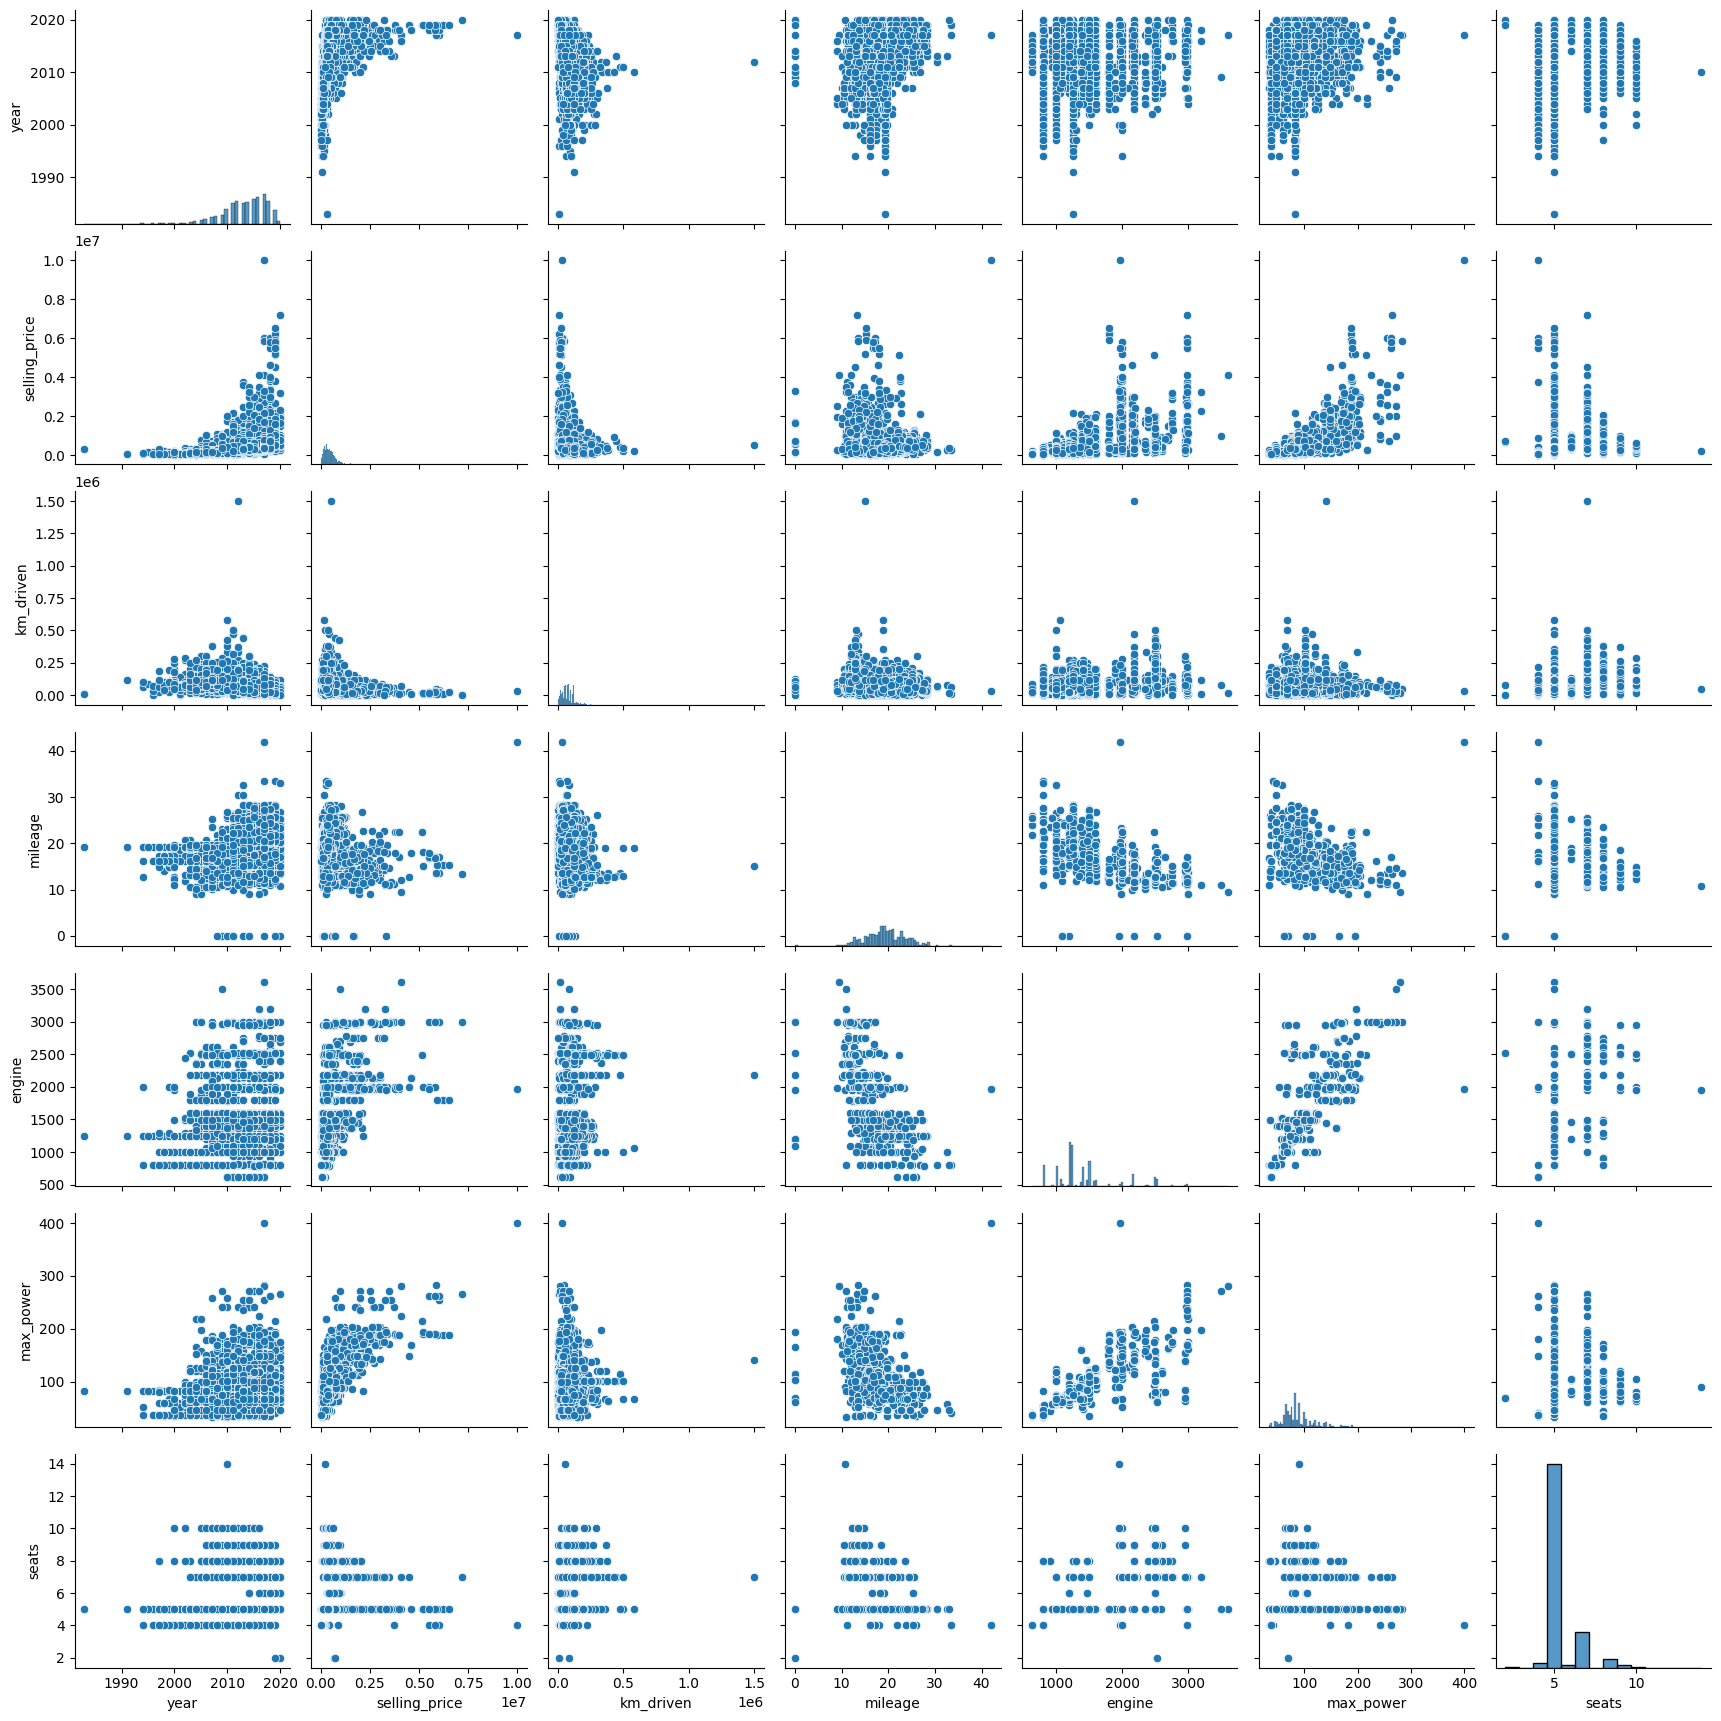

In [261]:
sns.pairplot(df_train.select_dtypes(include="number"))

Заметно, что значения year растут вместе с целевой переменной, а для km_driven, значения целевой переменной падают с ростом пробега. Так же значения целевой переменной растут вместе с max_power и engine. Менее выраженно цена падает с ростом mileage и seats.

Можно выдвиуть гипотезу о корреляции engine и max_power, возможно year и km_driven.

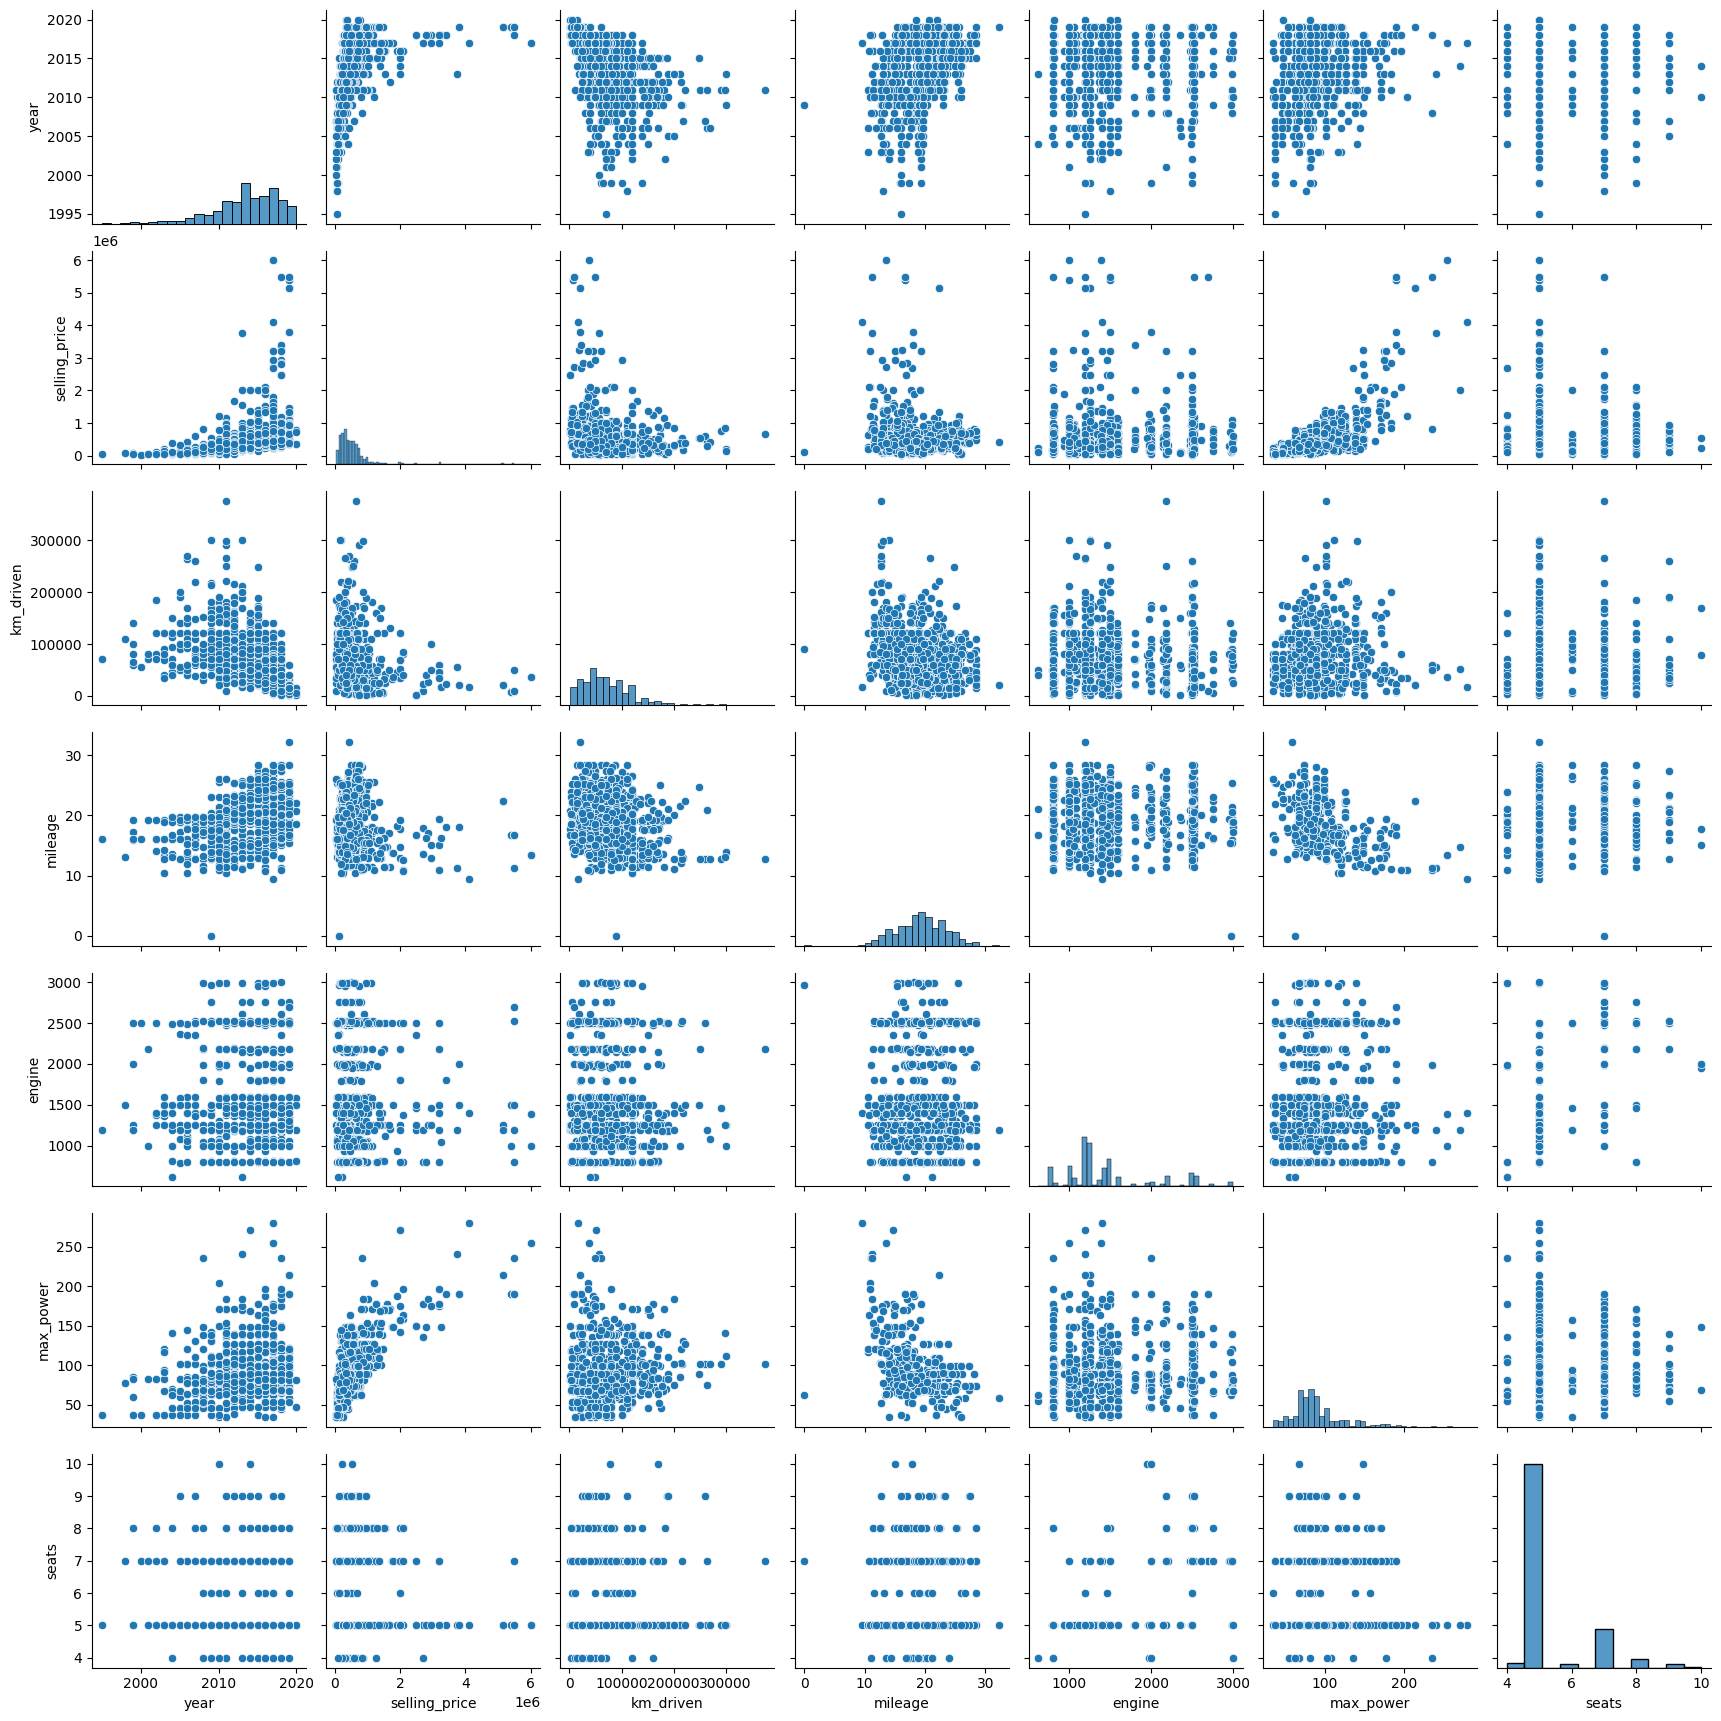

In [262]:
sns.pairplot(df_test.select_dtypes(include="number"))

Совокупности оказались очень похожи.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [X] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [X] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


<Axes: >

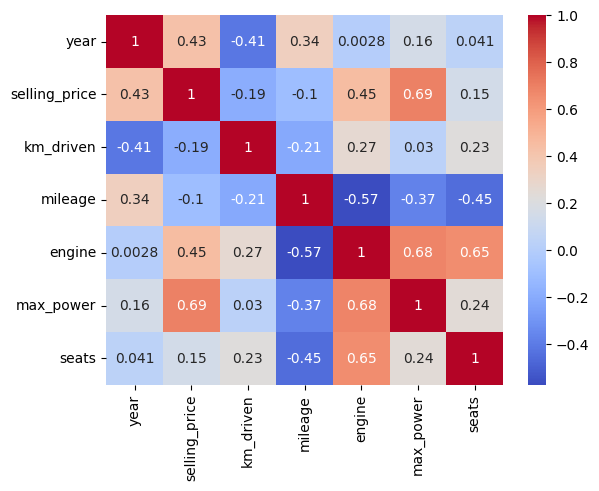

In [263]:
sns.heatmap(df_train.corr(numeric_only=True), cmap="coolwarm", annot=True)

- [X] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

- max_power и km_driven;
- max_power, engine, max_power, selling_price;
- да, но при этом коэффициент корреляции не очень выскоий;

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

In [264]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [265]:
target_col = "selling_price"

train_num = df_train.copy()
test_num = df_test.copy()

num_cols = train_num.select_dtypes(include=["number"]).columns
num_cols = num_cols.drop(target_col)

In [266]:
y_train = train_num[target_col]
X_train = train_num[num_cols]

In [267]:
X_train.describe()

,year,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,7.356004e+04,19.428612,1429.448973,87.952904,5.426712
std,4.095622,5.208660e+04,3.986026,485.662834,31.577028,0.982344
min,1983.000000,1.000000e+00,0.000000,624.000000,32.799999,2.000000
25%,2011.000000,3.900000e+04,16.950001,1197.000000,68.000000,5.000000
50%,2014.000000,7.000000e+04,19.299999,1248.000000,82.000000,5.000000
75%,2017.000000,1.000000e+05,22.299999,1498.000000,99.000000,5.000000
max,2020.000000,1.500000e+06,42.000000,3604.000000,400.000000,14.000000


In [268]:
y_test = test_num[target_col]
X_test = test_num[num_cols]

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [X] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [X] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [269]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE # noqa

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

f"R^2: {r2_score(y_test, y_pred)}; MSE: {MSE(y_test, y_pred)}"

'R^2: 0.5665139317930843; MSE: 249180170476.76956'

По MSE трудно делать выводы, так как у столбцов разные масштабы. По $R^2 = 0.57$ видно, что результаты модели "средние", значительно лучше, чем модель, которая всегда бы предсказывала среднее значение целевой переменной на обучающей выборке, но все еще есть место для улучшения.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [X] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [270]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [X] Какой признак оказался наиболее информативным в предсказании цены?

In [271]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

f"R^2: {r2_score(y_test, y_pred)}; MSE: {MSE(y_test, y_pred)}"

'R^2: 0.5665139317930898; MSE: 249180170476.76633'

In [272]:
lr.coef_

array([143282.6205815 , -59105.33225168,  32697.93434277,  67694.34543787,
       321659.4415047 , -20194.70418737])

Наиболее информативным оказался год.

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [X] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [X] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [273]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

f"R^2: {r2_score(y_test, y_pred)}; MSE: {MSE(y_test, y_pred)}"

'R^2: 0.5665154898117087; MSE: 249179274883.174'

In [274]:
lasso.coef_

array([143282.55232004, -59104.10046937,  32695.99922812,  67689.39244198,
       321660.36925655, -20191.84712886])

Lasso слабо улучшило качество модели и не занулило ни один из признаков. Вероятно, каждый из признаков значим и модель не была переобучена, либо недостаточно большой $\alpha$.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [X] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [X] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
  - 120
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?
  - $\alpha=10000$. Получилось занулить seats.

In [275]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(
    alpha=[0.001, 0.01, 0.1, 0.5, 1, 1.5, 5, 10, 100, 1000, 10000, 11000],
)

lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=10, n_jobs=-1, scoring="r2")
grid_search_lasso.fit(X_train, y_train)


,estimator,Lasso()
,param_grid,"{'alpha': [0.001, 0.01, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,10000


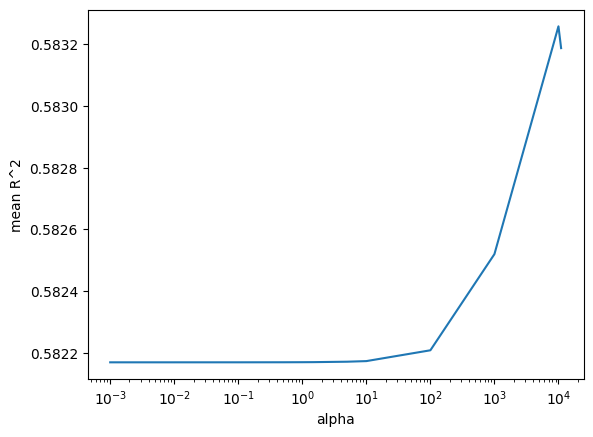

In [276]:
alphas = param_grid["alpha"]
mean_scores = grid_search_lasso.cv_results_["mean_test_score"]

plt.plot(alphas, mean_scores)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("mean R^2")

plt.show()

In [277]:
grid_search_lasso.best_estimator_.coef_

array([143888.13940158, -46512.10881097,  12200.97578776,  25505.36876313,
       327365.32518019,     -0.        ])

In [278]:
lasso_pred = grid_search_lasso.predict(X_test)
r2_score(y_test, lasso_pred)

0.5758567226001772

**Ваша задача 2:**

- [X] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [X] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
  - 630
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?
  - $\alpha=10$, l1_ratio=0.99

In [279]:
from sklearn.linear_model import ElasticNet

param_grid = dict(
    alpha=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 15000],
    l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99],
)

en = ElasticNet()
grid_search_en = GridSearchCV(en, param_grid, cv=10, n_jobs=-1, scoring="r2")
grid_search_en.fit(X_train, y_train)

,estimator,ElasticNet()
,param_grid,"{'alpha': [0.001, 0.01, ...], 'l1_ratio': [0.1, 0.3, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,10


In [280]:
grid_search_en.best_params_, grid_search_en.best_score_

({'alpha': 10, 'l1_ratio': 0.99}, np.float64(0.5892614265420825))

In [281]:
en_pred = grid_search_en.predict(X_test)
r2_score(y_test, en_pred)

0.5293434376343387

Качество модели ухудшилось попрубем убрать столбец seats, как это произошло в lasso.

In [282]:
X_train

array([[ 0.13956959,  1.38127891,  0.99641302, -0.37364298, -0.44190667,
        -0.43441899],
       [ 0.13956959,  0.89166768,  0.42938369,  0.14116151,  0.49303005,
        -0.43441899],
       [-0.83716668,  1.02607076,  0.89605395, -0.06887872,  0.06483416,
        -0.43441899],
       ...,
       [-0.10461448,  0.69966327, -0.23298664, -0.4786631 , -0.1616157 ,
        -0.43441899],
       [-1.56971888,  0.87246724, -0.65951327,  0.13086542,  0.69826019,
        -0.43441899],
       [-1.08135075,  0.89166768, -0.0322685 , -0.37364298, -0.44507375,
        -0.43441899]], shape=(5840, 6))

In [283]:
X_train = np.delete(X_train, 5, axis=1)
X_test = np.delete(X_test, 5, axis=1)

In [284]:
from sklearn.linear_model import ElasticNet

param_grid = dict(
    alpha=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 15000],
    l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99],
)

en = ElasticNet()
grid_search_en = GridSearchCV(en, param_grid, cv=10, n_jobs=-1, scoring="r2")
grid_search_en.fit(X_train, y_train)

,estimator,ElasticNet()
,param_grid,"{'alpha': [0.001, 0.01, ...], 'l1_ratio': [0.1, 0.3, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,10


In [285]:
en_pred = grid_search_en.predict(X_test)
r2_score(y_test, en_pred)

0.5326909972374847

In [303]:
grid_search_en.best_params_

{'alpha': 10, 'l1_ratio': 0.99}

Ситуация улучшилась, но незначительно. похоже, что в данном случае l1 подходит лучше.

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [X] Удалить столбец`name`

In [286]:
y_train_cat = df_train["selling_price"]
X_train_cat = df_train.drop(columns=["selling_price", "name"])

In [287]:
y_test_cat = df_test["selling_price"]
X_test_cat = df_test.drop(columns=["selling_price", "name"])

In [288]:
feature_names = list(X_train_cat.columns)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [289]:
assert X_train_cat.shape == (5840, 10)

In [290]:
X_train_cat.describe(include=["object", "category"])

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [X] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [291]:
X_train_cat["seats"] = X_train_cat["seats"].astype("category")
X_test_cat["seats"] = X_test_cat["seats"].astype("category")

In [297]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder

encoder = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"), make_column_selector(dtype_include="category")),
        ("scaler", StandardScaler(), make_column_selector(dtype_include="number")),
    ],
    remainder="passthrough"
)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [X] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [X] Ответье на вопрос: Удалось ли улучшить качество прогнозов?
- Удалось значительно

In [299]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

In [300]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid = dict(
    model__alpha=[0.001, 0.01, 0.1, 0.5, 1, 1.5, 5, 10, 100, 1000, 10000, 15000],
)

ridge = Pipeline([("preprocessor", encoder), ("model", Ridge())])
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=10, n_jobs=-1, scoring="r2")
grid_search_ridge.fit(X_train_cat, y_train_cat)

,estimator,"Pipeline(step...l', Ridge())])"
,param_grid,"{'model__alpha': [0.001, 0.01, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('onehot', ...), ('scaler', ...)]"


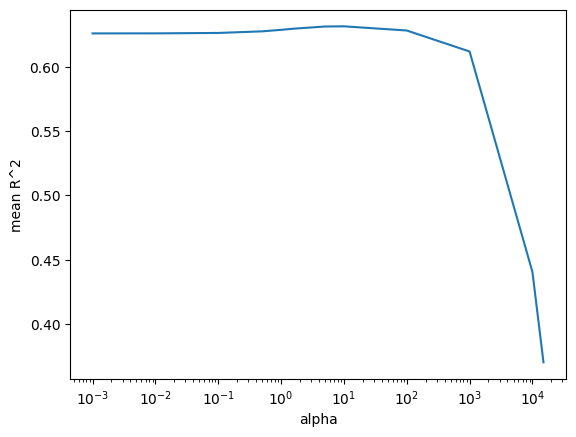

In [301]:
alphas = param_grid["model__alpha"]
mean_scores = grid_search_ridge.cv_results_["mean_test_score"]

plt.plot(alphas, mean_scores)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("mean R^2")

plt.show()

In [302]:
ridge_pred = grid_search_ridge.predict(X_test_cat)
r2_score(y_test_cat, grid_search_ridge.predict(X_test_cat))

0.6146141609478204

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [X] Реализуйте метрику `business_metric`
- [X] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [215]:
def business_metric(y_true, y_pred): # noqa
    rel_abs_err = np.abs(y_true - y_pred) / y_true
    return np.mean(rel_abs_err <= 0.1)


f"Linear: {business_metric(y_test, y_pred)}; Lasso: {business_metric(y_test, lasso_pred)}; ElasticNet: {business_metric(y_test, en_pred)} Ridge: {business_metric(y_test, ridge_pred)}"

'Linear: 0.195; Lasso: 0.208; ElasticNet: 0.212 Ridge: 0.198'

ElasticNet на категориальных признаках лушче всего решает задачу бизнеса.

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

In [216]:
pipeline = grid_search_ridge.best_estimator_

In [217]:
import os
import pickle

artifacts_dir = "artifacts"
os.makedirs(artifacts_dir, exist_ok=True)

In [142]:
model_path = os.path.join(artifacts_dir, 'pipeline.pkl')
with open(model_path, 'wb') as f:
    # noinspection PyTypeChecker
    pickle.dump(pipeline, f, protocol=pickle.HIGHEST_PROTOCOL)

medians_path = os.path.join(artifacts_dir, 'medians.pkl')
with open(medians_path, 'wb') as f:
    # noinspection PyTypeChecker
    pickle.dump(medians, f, protocol=pickle.HIGHEST_PROTOCOL)

# **Часть 6 | Оформление репозитория и оценка сервиса (2 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.